<b>Лабораторная работа №3</b><br>
<b>Выполнила:</b> Жихаревич Ирина<br>
<b>Грппа:</b> К3443<br>
<b>Проверил:</b> Хлопотов М.В.<br>
<b>«Агрегация новостных потоков с помощью машинного обучения»</b><br>
Основная задача: В рамках дипломной работы будет реализован классификатор новостных статей.
На данный момент подготовка реального датасета еще в процессе, поэтому алгоритм выполнен на известном датасете новостей Reuters.<br>
Существует 46 разных тем, для каждой из которых имеется не менее 10 примеров в обучающем наборе.

Загрузка данных Reuters

In [3]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 2s 1us/step


Всего 8982 обучающих и 2246 тестовых примеров.

In [5]:
print("Training examples: ", len(train_data))
print("Test examples: ", len(test_data))

Training examples:  8982
Test examples:  2246


Каждый пример - список целых чисел (индексов слов).

In [7]:
print("Word indeces: ", test_data[10])

Word indeces:  [1, 361, 372, 8, 77, 62, 325, 4105, 336, 5, 1605, 37, 412, 453, 1187, 229, 334, 13, 4, 867, 76, 4, 76, 1726, 6, 264, 2337, 18, 82, 95, 97, 2220, 4, 1004, 649, 18, 82, 554, 136, 4, 143, 334, 290, 126, 5, 4, 2820, 777, 2, 1386, 13, 954, 7, 4, 314, 912, 224, 4, 2370, 1128, 54, 429, 2, 18, 82, 5, 496, 1187, 229, 57, 85, 385, 593, 6, 4, 867, 76, 17, 12]


Декодирование новостей обратно в текст.

In [8]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
    train_data[0]])


557056/550378 [==============================] - 1s 1us/step


In [9]:
train_labels[10]

3

<b>Подготовка данных</b>

Кодирование данных. Представление данных в виде векторов.

In [10]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


In [12]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

<b>Конструирование нейронной сети</b>

Определение модели

In [13]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

Последний слой используем функцию активации softmax. Это означает, что сеть будет выводить распределение вероятностей по 46 разным классам с вероятностью принадлежности образца к каждому классу.

Компиляция модели

In [14]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

<b>Проверка решения</b>

Создание проверочного набора

In [15]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

Обучение модели

In [16]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 111us/step - loss: 2.5278 - accuracy: 0.5319 - val_loss: 1.7401 - val_accuracy: 0.6410
Epoch 2/20
7982/7982 [==============================] - 1s 96us/step - loss: 1.4277 - accuracy: 0.6997 - val_loss: 1.3617 - val_accuracy: 0.7050
Epoch 3/20
7982/7982 [==============================] - 1s 90us/step - loss: 1.0759 - accuracy: 0.7642 - val_loss: 1.1619 - val_accuracy: 0.7470
Epoch 4/20
7982/7982 [==============================] - 1s 94us/step - loss: 0.8511 - accuracy: 0.8173 - val_loss: 1.0595 - val_accuracy: 0.7800
Epoch 5/20
7982/7982 [==============================] - 1s 89us/step - loss: 0.6807 - accuracy: 0.8549 - val_loss: 0.9781 - val_accuracy: 0.7990
Epoch 6/20
7982/7982 [==============================] - 1s 89us/step - loss: 0.5389 - accuracy: 0.8879 - val_loss: 0.9531 - val_accuracy: 0.8010
Epoch 7/20
7982/7982 [==============================] - 1s 90us/step - loss: 0.4

Формирование графика потерь на этапах обучения и проверки

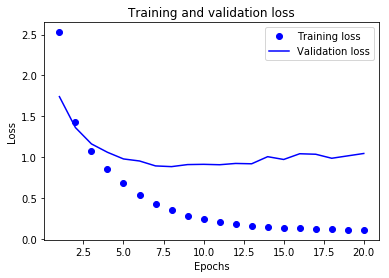

In [31]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Формирование графика точности на этапах обучения и проверки

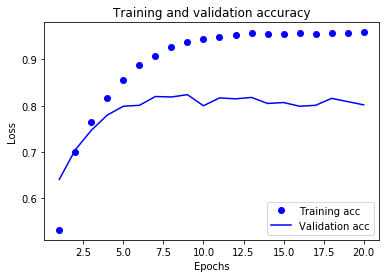

In [35]:
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


Переобучение сети происходит на 9 эпохе, поэтому обучаем новую сеть до 9 эпохи и проверяем результат на тестовых данных.

In [19]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 104us/step - loss: 2.7495 - accuracy: 0.4974 - val_loss: 1.8737 - val_accuracy: 0.6250
Epoch 2/9
7982/7982 [==============================] - 1s 90us/step - loss: 1.5351 - accuracy: 0.6845 - val_loss: 1.3586 - val_accuracy: 0.7110
Epoch 3/9
7982/7982 [==============================] - 1s 85us/step - loss: 1.1189 - accuracy: 0.7756 - val_loss: 1.1568 - val_accuracy: 0.7580
Epoch 4/9
7982/7982 [==============================] - 1s 88us/step - loss: 0.8809 - accuracy: 0.8168 - val_loss: 1.0482 - val_accuracy: 0.7790
Epoch 5/9
7982/7982 [==============================] - 1s 86us/step - loss: 0.7074 - accuracy: 0.8510 - val_loss: 0.9680 - val_accuracy: 0.7980
Epoch 6/9
7982/7982 [==============================] - 1s 87us/step - loss: 0.5720 - accuracy: 0.8812 - val_loss: 0.9221 - val_accuracy: 0.8130
Epoch 7/9
7982/7982 [==============================] - 1s 89us/step - loss: 0.4650 - ac

Финальные результаты

In [22]:
results

[0.9937047073061935, 0.7849510312080383]

In [23]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.18699910952804988

<b>Предсказания на новых данных</b>

In [24]:
predictions = model.predict(x_test)

In [25]:
predictions[0].shape

(46,)

In [26]:
np.sum(predictions[0])

0.9999999

Элемент с наибольшей вероятностью

In [27]:
np.argmax(predictions[0])

3